https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib ,                                          
https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt

In [95]:
#Graph for total water volume by phase

directory = r"H:\Metro-van\2021\Analysis\swe_tables\zbin"
file = "zbin_Seymour_all"
parameter = "zbin"
wshed = "Englishman"
subbasin = "Cokely"

out_directory = r"H:\Metro-van\2021\Analysis\figures\SWE_graphs"

totalwatervol_title = "Total Water Volume, 2021 \n" + wshed + " watershed: " + subbasin 
totalwatervol_output = "Total Water Volume" + wshed + "_" + subbasin + ".png"

In [96]:
#combine the csvs
def combine_csv_for_total_watervolume(wshed,file_name, directory, out_directory):
    os.chdir(directory)
    # Match the pattern (‘csv’) and save the list of file names in the ‘all_filenames’ variable.
    extension = 'csv'
    df = pd.DataFrame()
    for item in glob.glob('*.{}'.format(extension)):
            file = pd.read_csv(item)
            file["sub_basin"]=item[8:9]
            df = df.append(file)
    df = df.drop_duplicates()
    df = df.groupby(by=(["Phase", "sub_basin"]), as_index=False)[["water_vol", "lower_wv", "upper_wv"]].sum()
    # export to csv
    if wshed == "Englishman":
        df.replace({"A" : "Arrowsmith", "c": "Cokely", "f": "Fishtail"}, inplace=True)
    os.chdir(out_directory)
    df.to_csv(file_name, index=False)
    return df

df = combine_csv_for_total_watervolume(wshed,"Englishman_watervol_stackedbar.csv", r"H:\Englishman\2021\Analysis\swe_tables\processing\zbin", r"H:\Englishman\2021\Analysis\swe_tables\processing\graphs")


[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076)]

[1, 2, 3, 4, 5]

    Phase sub_basin   water_vol    lower_wv    upper_wv
0       1         A  3603066.72  3299650.56  3934928.14
3       2         A  3888890.19  3703704.95  4000001.36
6       3         A  3439161.93  3274082.16  3569850.08
9       4         A  2145967.68  2073085.74  2214800.58
12      5         A   670955.27   652121.47   693320.45
    Phase sub_basin   water_vol    lower_wv    upper_wv
1       1         c  3724979.49  3411297.01  4068069.70
4       2         c  3912764.51  3726442.39  4024557.78
7       3         c  3500860.58  3332819.28  3633893.28
10      4         c  2319066.10  2240305.33  2393451.22
13      5         c   627848.42   610224.59   648776.69
    Phase sub_basin   water_vol    lower_wv    upper_wv
2       1         f  6212981.28  5689782.85  6785229.55
5       2         f  6557828.65  6245551.07  6745195.16
8       3         f  6230792.24  5931714.21  6467562.32
11      4         f  4161213.32  4019889.07  4294686.18
14      5         f  1930134.20  1875955.00  199

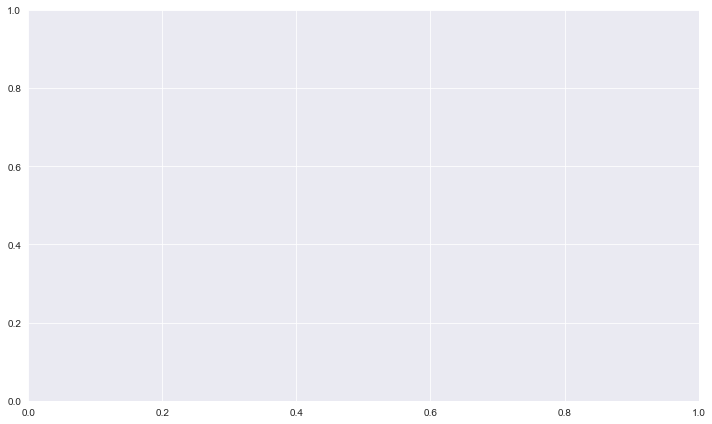

In [50]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
color_list = sns.color_palette()[:5]
color_list_d = sns.color_palette("dark")[:5]
display(color_list_d)
#plt.bar(sum["Phase"], sum["water_vol[:5]"], color=color_list)


# Get a series of unique values in column 'Age' of the dataframe
sub_basin = df['sub_basin'].unique().tolist()
phase = df['Phase'].unique().tolist()
display(phase)

#change the dataframe to arrays from the list of water volumes
def df_to_array(df, filter_parameter, array_parameter):
    values = {}
    for i in sub_basin:
        df1=df[df[filter_parameter]==i]
        df1.sort_values(by="Phase")
        print(df1)
        basin_array = np.array(df1[array_parameter])
        values.update({i : basin_array})
    return values

def getList(dict):
      return [*dict]

#these variables hold dictionaries of the arrays
water_vol = df_to_array(df, "sub_basin", "water_vol")
lower_wv = df_to_array(df, "sub_basin", "lower_wv")
upper_wv = df_to_array(df, "sub_basin", "upper_wv")

keys = getList(water_vol)
print(water_vol)
print(keys)
print(water_vol[keys[0]])

[1, 2, 3, 4, 5]

    Phase sub_basin   water_vol    lower_wv    upper_wv
0       1         A  3603066.72  3299650.56  3934928.14
3       2         A  3888890.19  3703704.95  4000001.36
6       3         A  3439161.93  3274082.16  3569850.08
9       4         A  2145967.68  2073085.74  2214800.58
12      5         A   670955.27   652121.47   693320.45
    Phase sub_basin   water_vol    lower_wv    upper_wv
1       1         c  3724979.49  3411297.01  4068069.70
4       2         c  3912764.51  3726442.39  4024557.78
7       3         c  3500860.58  3332819.28  3633893.28
10      4         c  2319066.10  2240305.33  2393451.22
13      5         c   627848.42   610224.59   648776.69
    Phase sub_basin   water_vol    lower_wv    upper_wv
2       1         f  6212981.28  5689782.85  6785229.55
5       2         f  6557828.65  6245551.07  6745195.16
8       3         f  6230792.24  5931714.21  6467562.32
11      4         f  4161213.32  4019889.07  4294686.18
14      5         f  1930134.20  1875955.00  199

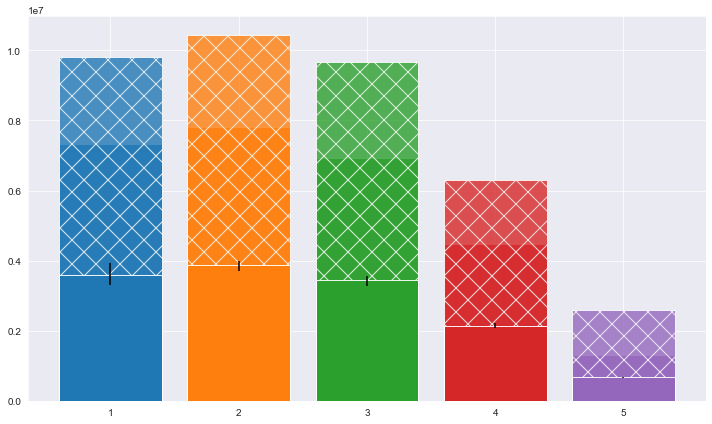

In [57]:
# Get a series of unique values in column 'Age' of the dataframe
sub_basin = df['sub_basin'].unique().tolist()
phase = df['Phase'].unique().tolist()
display(phase)

#change the dataframe to arrays from the list of water volumes
def df_to_array(df, filter_parameter, array_parameter):
    values = {}
    for i in sub_basin:
        df1=df[df[filter_parameter]==i]
        df1.sort_values(by="Phase")
        print(df1)
        basin_array = np.array(df1[array_parameter])
        values.update({i : basin_array})
    return values

def getList(dict):
      return [*dict]

#these variables hold dictionaries of the arrays
water_vol = df_to_array(df, "sub_basin", "water_vol")
lower_wv = df_to_array(df, "sub_basin", "lower_wv")
upper_wv = df_to_array(df, "sub_basin", "upper_wv")

keys = getList(water_vol)
print(water_vol)
print(keys)
print(water_vol[keys[0]])



sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
color_list = sns.color_palette()[:5]
pattern = ['x', '\\', '+','*', 'o', 'O', '.']
#plt.bar(sum["Phase"], sum["water_vol[:5]"], color=color_list)

#graph the first basin in the list first
top = plt.bar(phase, water_vol[keys[0]], color=color_list)
top = plt.vlines(phase, lower_wv[keys[0]], upper_wv[keys[0]], color="black")
bottom_key =  water_vol[keys[0]]
print(bottom_key)
#remove this basin from key list and basins
water_vol.pop(keys[0])
lower_wv.pop(keys[0])
upper_wv.pop(keys[0])

#loop through the sub-basins 
loop = 0
for key in water_vol:
    print(key)
    if loop == 0:
        add = water_vol[key]
        plt.bar(phase, water_vol[key], color=color_list,alpha=.8, bottom=bottom_key,hatch = pattern[loop])
        
plt.show()


    Phase   sub_basin   water_vol    lower_wv    upper_wv
0       1  Arrowsmith  3603066.72  3299650.56  3934928.14
3       2  Arrowsmith  3888890.19  3703704.95  4000001.36
6       3  Arrowsmith  3439161.93  3274082.16  3569850.08
9       4  Arrowsmith  2145967.68  2073085.74  2214800.58
12      5  Arrowsmith   670955.27   652121.47   693320.45
    Phase sub_basin   water_vol    lower_wv    upper_wv
1       1    Cokely  3724979.49  3411297.01  4068069.70
4       2    Cokely  3912764.51  3726442.39  4024557.78
7       3    Cokely  3500860.58  3332819.28  3633893.28
10      4    Cokely  2319066.10  2240305.33  2393451.22
13      5    Cokely   627848.42   610224.59   648776.69
    Phase sub_basin   water_vol    lower_wv    upper_wv
2       1  Fishtail  6212981.28  5689782.85  6785229.55
5       2  Fishtail  6557828.65  6245551.07  6745195.16
8       3  Fishtail  6230792.24  5931714.21  6467562.32
11      4  Fishtail  4161213.32  4019889.07  4294686.18
14      5  Fishtail  1930134.20  187

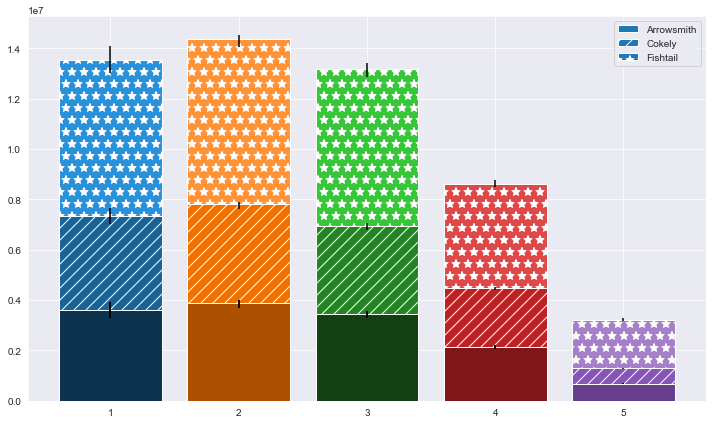

In [135]:
# Get a series of unique values in column 'Age' of the dataframe
sub_basin = df['sub_basin'].unique().tolist()
phase = df['Phase'].unique().tolist()
#lighten the colour function
def lighten_color(color_list, amount=0.1):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    values = []
    import matplotlib.colors as mc
    import colorsys
    for color in color_list:
        try:
            c = mc.cnames[color]
        except:
            c = color
            c = colorsys.rgb_to_hls(*mc.to_rgb(c))
        
        item = colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
        values.append(item)
    return values
color_list = lighten_color(sns.color_palette()[:5],1.4) #darken the standard seaborne color list

#change the dataframe to arrays from the list of water volumes
def df_to_array(df, filter_parameter, array_parameter):
    values = {}
    for i in sub_basin:
        df1=df[df[filter_parameter]==i]
        df1.sort_values(by="Phase")
        print(df1)
        basin_array = np.array(df1[array_parameter])
        values.update({i : basin_array})
    return values

def getList(dict):
      return [*dict]

#these variables hold dictionaries of the arrays
water_vol = df_to_array(df, "sub_basin", "water_vol")
lower_wv = df_to_array(df, "sub_basin", "lower_wv")
upper_wv = df_to_array(df, "sub_basin", "upper_wv")

keys = getList(water_vol)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)

pattern = ["",'//',"*" ,'\\', '+','*', 'o', 'O', '.']

#graph the first basin in the list first
plt.bar(phase, water_vol[keys[0]], color=color_list)
plt.vlines(phase, lower_wv[keys[0]], upper_wv[keys[0]], color="black")

#loop through the sub-basins 
loop = 0
bottom = water_vol[keys[0]]
amount = .8

for key in water_vol:
    print(key)
    if loop == 0:
        plt.bar(phase, bottom, color=color_list)
        plt.vlines(phase, lower_wv[keys[0]], upper_wv[keys[0]], color="black")
        loop = loop + 1
    else:
        add = water_vol[keys[loop]] #find the amount to add
        add_ue = upper_wv[keys[loop]] + bottom
        add_le = lower_wv[keys[loop]] + bottom
        plt.bar(phase, add, color=lighten_color(color_list,amount), bottom=bottom, hatch = pattern[loop])
        plt.vlines(phase, add_le, add_ue, "black")
        bottom = bottom + add #add the amount to the bottom of the bars
        loop = loop + 1
        amount = amount - .2 #change the hue

labels = list(water_vol.keys())
print(pattern[0:len(labels)+1])
pattern_dict = dict(zip(labels,pattern[0:len(labels)+1]))
print(pattern_dict)
#handles = color
handles = [plt.Rectangle((2,2),4,4,hatch = pattern_dict[label]) for label in labels]
ax.legend(labels = labels, handles = handles) #get the legend 
plt.show()


In [ ]:


# Get a series of unique values in column 'Age' of the dataframe
sub_basin = df['sub_basin'].unique().tolist()
phase = df['Phase'].unique().tolist()
#lighten the colour function
def lighten_color(color_list, amount=0.1):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    values = []
    import matplotlib.colors as mc
    import colorsys
    for color in color_list:
        try:
            c = mc.cnames[color]
        except:
            c = color
            c = colorsys.rgb_to_hls(*mc.to_rgb(c))
        
        item = colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
        values.append(item)
    return values
color_list = lighten_color(sns.color_palette()[:5],1.4) #darken the standard seaborne color list

#change the dataframe to arrays from the list of water volumes
def df_to_array(df, filter_parameter, array_parameter):
    values = {}
    for i in sub_basin:
        df1=df[df[filter_parameter]==i]
        df1.sort_values(by="Phase")
        print(df1)
        basin_array = np.array(df1[array_parameter])
        values.update({i : basin_array})
    return values

def getList(dict):
      return [*dict]

#these variables hold dictionaries of the arrays
water_vol = df_to_array(df, "sub_basin", "water_vol")
lower_wv = df_to_array(df, "sub_basin", "lower_wv")
upper_wv = df_to_array(df, "sub_basin", "upper_wv")

keys = getList(water_vol)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)

pattern = ["",'/',"x" ,'\\', '+','*', 'o', 'O', '.']

pattern_dictionary = dict(zip(sub_basins, ))

#graph the first basin in the list first
plt.bar(phase, water_vol[keys[0]], color=color_list)
plt.vlines(phase, lower_wv[keys[0]], upper_wv[keys[0]], color="black")

#loop through the sub-basins 
loop = 0
bottom = water_vol[keys[0]]
amount = .8

for key in water_vol:
    print(key)
    if loop == 0:
        plt.bar(phase, bottom, color=color_list)
        plt.vlines(phase, lower_wv[keys[0]], upper_wv[keys[0]], color="black")
        loop = loop + 1
    else:
        add = water_vol[keys[loop]] #find the amount to add
        add_ue = upper_wv[keys[loop]] + bottom
        add_le = lower_wv[keys[loop]] + bottom
        plt.bar(phase, add, color=lighten_color(color_list,amount), bottom=bottom, hatch = pattern[loop])
        plt.vlines(phase, add_le, add_ue, "black")
        bottom = bottom + add #add the amount to the bottom of the bars
        loop = loop + 1
        amount = amount - .2 #change the hue

plt.show()

In [18]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
color_list = sns.color_palette()[:5]
color_list_d = sns.color_palette("dark")[:5]
display(color_list_d)
#plt.bar(sum["Phase"], sum["water_vol[:5]"], color=color_list)

keys = getList()
#graph the top basin first
top = plt.bar(df["Phase"], water_vol[keys[0]], color=color_list)
top = plt.vlines(df["Phase"], lower_wv[keys[0]], upper_wv[keys[0]], color="black")


#graph the top basin first
#top = df[df["sub_basin"]==sub_basin[0]]
#top = plt.bar(top["Phase"], top["water_vol"], color=color_list)
#top = plt.vlines(top["Phase"],top["lower_wv"],top["upper_wv"],color="black")

#remove this basin from the basin list
#del sub_basin[0]


#count = 0
#alpha = 0.6

#loop through the sub-basins 
#for i in sub_basin:
    #print(i)
    #bar=df[df["sub_basin"]==i]
    #plt.bar(bar["Phase"], bar["water_vol"], color=color_list,alpha=.8, , bottom=top["water_vol"]+"waterhatch = pattern[count])
    
    

plt.show()   

#variables per each phase
p01 = df[df["Phase"]==1]
p02 = df[df["Phase"]==2]
p03 = df[df["Phase"]==3]
p04 = df[df["Phase"]==4]
p05 = df[df["Phase"]==5]


#p01 = plt.bar(df["phase]",p01, width, color='r')
p2 = plt.bar(ind, dataset[2], width, bottom=dataset[1], color='b')
p3 = plt.bar(ind, dataset[3], width,
             bottom=[sum(x) for x in zip(dataset[1],dataset[2])], color='g')
p4 = plt.bar(ind, dataset[4], width,
             bottom=[sum(x) for x in zip(dataset[1],dataset[2],dataset[3])],
             color='c')

#ax.yaxis.set_ticks(np.arange(0, 1700, 200))

ax.set_ylabel("Water Storage [$m^{3}$]", fontsize=14)
ax.set_xlabel("Phase", fontsize=14)
labels2021 = ["P01:\n March 11 2021", "P02:\n April 5 2021", "P03:\n April 20 2021", "P04:\n May 15 2021", "P05:\n June 21 2021"]
plt.xticks(sum.Phase, fontsize=12)
ax.set_xticklabels(labels2021)



VAN_tick_labels = ["0", "10,000,000", "20,000,000", "30,000,000", "40,000,000", "50,000,000", "60,000,000", "70,000,000", "80,000,000","90,000,000"]

#Englishman errorbars
plt.vlines(sum["Phase"],sum["lower_wv"],sum["upper_wv"],color="black")
plt.yticks(np.arange(0, 100000000, step=10000000),fontsize=12)
ax.set_yticklabels(VAN_tick_labels)

EGM_yticklabels = ["0","500,000","1,000,000","1,500,000", "2,000,000", "2,500,000", "3,000,000", "3,500,000", "4,000,000", "4,500,000", "5,000,000", "5,500,000", "6,000,000","6,500,000","7,000,000"]

os.chdir(out_directory_list[wshed])
plt.savefig(totalwatervol_output)
plt.show()

IndentationError: unexpected indent (610623860.py, line 31)